In [2]:
import sys
import tensorflow as tf
import keras
import matplotlib as mpl
import seaborn as sns
import numpy as np
import sklearn as sk
import pandas as pd

In [3]:
print(sys.version)
print(tf.__version__)
print(keras.__version__)
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(sk.__version__)
print(pd.__version__)

3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
2.10.0
2.10.0
3.6.1
0.12.0
1.23.3
1.1.1
1.5.0


In [10]:
# tr = pd.read_csv('./data/bike/bike_mod_tr.csv', parse_dates=['datetime'])
# test = pd.read_csv('./data/bike/bike_mod_test.csv', parse_dates=['datetime'])
# sub = pd.read_csv('./data/bike/sampleSubmission.csv')

In [11]:
tr.shape, test.shape, sub.shape

((10886, 19), (6493, 16), (6493, 2))

## 데이터 탐색

In [12]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [13]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'second'],
      dtype='object')

In [14]:
sub.columns

Index(['datetime', 'count'], dtype='object')

In [18]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

### 입력(input)과 출력(output) 지정

In [15]:
input_col = ['weather', 'temp']
labeled_col = ['count']

In [17]:
X = train[input_col]
y = train[labeled_col]
X_val = test[input_col]

### 데이터 나누기

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
# 자체학습, 자체평가
# 75%, 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
print(X_train.shape)
print(X_test.shape)

(8164, 2)
(2722, 2)


### 딥러닝 모델 만들기 및 학습

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# 모델 구축
model = Sequential()
model.add(Dense(30, input_dim=2, activation='relu')) # 각각 뉴런마다 뉴런에 나온 결과에 활성화함수를 씌워서 다음 층의 입력으로 보낸다.
model.add(Dense(15, activation='relu')) 
model.add(Dense(15, activation='relu'))
model.add(Dense(1)) # 맨 마지막의 출력층은 다른 활성화 함수가 적용된다.

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                90        
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train.shape

(8164, 2)

- **`에폭(epoch)`** : 학습에서 훈련데이터를 모두 소진했을 때의 횟수 (훈련데이터 다 쓸때까지!!)


- **`미니 배치(mini batch)`** : 전체 데이터 셋을 몇 개의 데이터 셋으로 나누었을 때, 그 작은 데이터 셋 뭉치


- **`배치 사이즈`** : 하나의 미니 배치에 넘겨주는 데이터의 개수 (한 번의 배치마다 주는 샘플 size)


- **`iteration`** : 하나의 미니배치를 학습할 때 1iteration이라고 한다.

In [33]:
8200/100

82.0

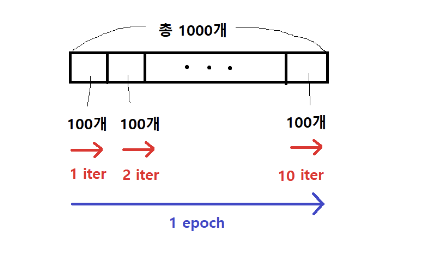

에포크는 하나의 데이터셋을 몇 번 반복 학습할지 정하는 파라미터입니다. 같은 데이터셋이라 할지라도 가중치가 계속해서 업데이트되기 때문에 모델이 추가적으로 학습이 가능합니다. 반복학습을 통해 모델의 성능을 향상시킬 수 있습니다. 하지만, 너무 많이 반복학습을 하면 학습셋에 대해 성능은 올라가지만 관측되지 못한 테스트셋에 대한 성능이 떨어지는 오버피팅(overfitting)이 발생하게 됩니다. 때문에, 오버피팅이 일어날 것 같으면 학습을 종료합니다.(early stopping)

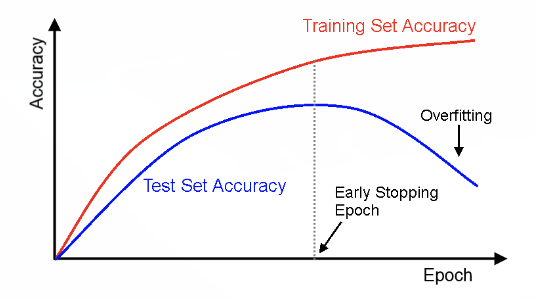

- 8164개의 train data

In [31]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=20, batch_size=100) # 하나의 미니배치에 100개의 데이터가 들어간다.

Epoch 1/20
82/82 [==============================] - 1s 960us/step - loss: 60479.6914
Epoch 2/20
82/82 [==============================] - 0s 1ms/step - loss: 37635.4414
Epoch 3/20
82/82 [==============================] - 0s 1ms/step - loss: 27985.5859
Epoch 4/20
82/82 [==============================] - 0s 911us/step - loss: 27894.8535
Epoch 5/20
82/82 [==============================] - 0s 828us/step - loss: 27856.0293
Epoch 6/20
82/82 [==============================] - 0s 1ms/step - loss: 27816.9531
Epoch 7/20
82/82 [==============================] - 0s 1ms/step - loss: 27826.6484
Epoch 8/20
82/82 [==============================] - 0s 870us/step - loss: 27788.8477
Epoch 9/20
82/82 [==============================] - 0s 852us/step - loss: 27751.6680
Epoch 10/20
82/82 [==============================] - 0s 889us/step - loss: 27756.8027
Epoch 11/20
82/82 [==============================] - 0s 1ms/step - loss: 27720.9668
Epoch 12/20
82/82 [==============================] - 0s 940us/step - loss

```
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(X_train, y_train, epochs=20, batch_size=100) 
```

- train data = 8164
- 하나의 미니배치당 100개의 샘플이 들어가고  그럼 미니배치(덩어리)의 개수는 82개가 나온다.
- 20에폭은 훈련데이터 전체를 다써서 학습하는 것을 20번한다는 것이다.

In [32]:
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, epochs=20, batch_size=1)

Epoch 1/20
8164/8164 [==============================] - 6s 741us/step - loss: 27899.6855
Epoch 2/20
8164/8164 [==============================] - 6s 732us/step - loss: 27856.3203
Epoch 3/20
8164/8164 [==============================] - 6s 718us/step - loss: 27781.3906
Epoch 4/20
8164/8164 [==============================] - 6s 733us/step - loss: 27785.9258
Epoch 5/20
8164/8164 [==============================] - 6s 718us/step - loss: 27802.3789
Epoch 6/20
8164/8164 [==============================] - 6s 720us/step - loss: 27721.9043
Epoch 7/20
8164/8164 [==============================] - 6s 721us/step - loss: 27770.6055
Epoch 8/20
8164/8164 [==============================] - 6s 732us/step - loss: 27604.7305
Epoch 9/20
8164/8164 [==============================] - 6s 706us/step - loss: 27680.3574
Epoch 10/20
8164/8164 [==============================] - 6s 719us/step - loss: 27679.2871
Epoch 11/20
8164/8164 [==============================] - 6s 727us/step - loss: 27669.7188
Epoch 12/20
8164/81

### 모델 평가

In [34]:
model.evaluate(X_test, y_test)

86/86 [==============================] - 0s 1ms/step - loss: 27422.3418


27422.341796875

### 예측 수행

In [35]:
pred = model.predict(X_val)

203/203 [==============================] - 0s 934us/step


In [36]:
sub = pd.read_csv('./data/bike/sampleSubmission.csv')
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0

In [38]:
#sub.to_csv('C:/Users/82103/Desktop\dino/MyDataAnalysis_2022/bike_sharing/8th_model_nn.csv', index=False)

### 변수를 추가해가며 성능을 향상시켜보자.

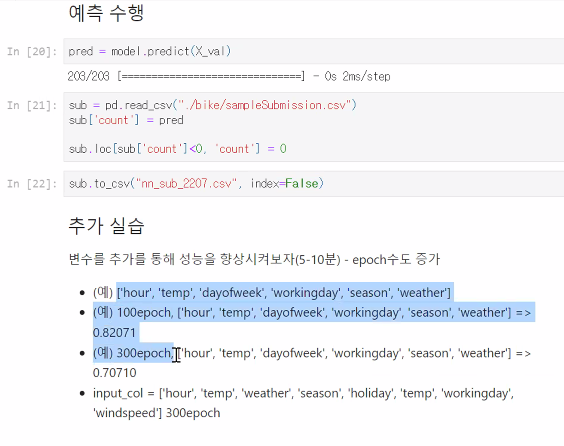